<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.855 · Modelos avanzados de minería de datos · PEC1</p>
<p style="margin: 0; text-align:right;">2022-2 · Máster universitario en Ciencia de datos (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación

 </p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PEC 1: Preparación de datos

A lo largo de esta práctica veremos cómo aplicar diferentes técnicas para la carga y preparación de datos:

 <ol start="1">
  <li>Carga de un conjunto de datos</li>
  <li>Análisis de los datos
  <br>2.1 Análisis estadístico básico
  <br>2.2 Análisis exploratorio de los datos
  <li>Preprocesado de los datos</li>
  <li>Reducción de la dimensionalidad</li>
  <li>Entrenamiento y test</li>
</ol>
   
**Importante:** Cada uno de los ejercicios puede suponer varios minutos de ejecución, por lo que la entrega debe hacerse en formato notebook y en formato html, donde se vea el código, los resultados y comentarios de cada ejercicio. Se puede exportar el notebook a html desde el menú File $\to$ Download as $\to$ HTML.

**Importante:** Existe un tipo de celda especial para albergar texto. Este tipo de celda os será muy útil para responder a las diferentes preguntas teóricas planteadas a lo largo de cada PEC. Para cambiar el tipo de celda a este tipo, elegid en el menú: Cell $\to$ Cell Type $\to$ Markdown.

**Importante:** La solución planteada no debe utilizar métodos, funciones o parámetros declarados "deprecated" en futuras versiones.
   
Para la realización de la práctica necesitaremos las siguientes librerías:

<div class="alert alert-block alert-info">
<strong>Nombre y apellidos:</strong> Lukaz Martin Doehne
</div>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import preprocessing
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score

import matplotlib
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
seed = 100

%matplotlib inline

# 1. Carga del conjunto de datos (1 punto)

A lo largo de esta práctica utilizaremos el conjunto de datos [Forest Fires Data Set](https://archive.ics.uci.edu/ml/datasets/forest+fires), el cual contiene información relevante acerca de distintos incendios acaecidos en el noreste de Portugal. Cada muestra del conjunto de datos estará formada por el área de bosque quemada y el valor de múltiples factores que podrían ser los detonantes o catalizadores del fuego. El conjunto de datos lo encontraréis en el siguiente enlace: https://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv.

Nota: para los ejercicios de esta PEC, utilizaremos como variable objetivo el "area": número de hectáreas afectadas por el incendio. El resto de variables del conjunto de datos conformarán los atributos descriptivos.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> cargad el conjunto de datos "Forest Fires Data Set" utilizando el método "read_csv" de "pandas" y mostrad:
<ul>
  <li>El número de filas (muestras) del conjunto de datos.</li>
  <li>El número y nombre de los atributos descriptivos (variables que podrían ser usadas para predecir la variable objetivo).</li>
  <li>Contrastad dichos atributos con los que se describen en la página web del conjunto de datos.</li>
  <li>Verificad si hay o no "missing values" y en qué columnas.</li>
</ul>
Sugerencia: separad el conjunto de datos original en las variables "X" (atributos descriptivos) e "y" (variable objetivo).
</div>

In [2]:
df = pd.read_csv('forestfires.csv')

# Atributos descriptivos
X = df.drop('area',axis=1)

# Variable objetivo
y = df['area']

print(f"El número de filas del conjunto de datos: {df.shape[0]}")
print(f"El número de atributos descriptivos: {X.shape[1]}")
print(f"El nombre de los atributos descriptivos: {' '.join(X.columns.values).replace(' ', ', ')}")

El número de filas del conjunto de datos: 517
El número de atributos descriptivos: 12
El nombre de los atributos descriptivos: X, Y, month, day, FFMC, DMC, DC, ISI, temp, RH, wind, rain


**Observamos que los atributos coinciden con los descritos en la página web**
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
3. month - month of the year: 'jan' to 'dec'
4. day - day of the week: 'mon' to 'sun'
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
6. DMC - DMC index from the FWI system: 1.1 to 291.3
7. DC - DC index from the FWI system: 7.9 to 860.6
8. ISI - ISI index from the FWI system: 0.0 to 56.10
9. temp - temperature in Celsius degrees: 2.2 to 33.30
10. RH - relative humidity in %: 15.0 to 100
11. wind - wind speed in km/h: 0.40 to 9.40
12. rain - outside rain in mm/m2 : 0.0 to 6.4
13. area - the burned area of the forest (in ha): 0.00 to 1090.84

In [3]:
print("Cantidad de missing values según columnas:")
pd.DataFrame(df.isna().sum()).T

Cantidad de missing values según columnas:


,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,0,0,0,0,0,0,0,0,0,0,0,0,0


# 2. Análisis de los datos (3 puntos)

## 2.1 Análisis estadístico básico

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> realizad un análisis estadístico básico: 
<ul>
  <li>Variables categóricas:</li>
     <ul>
      <li>Calculad la frecuencia.</li>
      <li>Haced un gráfico de barras.</li>
    </ul>
  <li>Variables numéricas:</li>
    <ul>
      <li>Calculad estadísticos descriptivos básicos: media, mediana, desviación estandard, ...</li>
      <li>Haced un histograma.</li>
    </ul>
  <li>Variables geoespaciales:</li>
    <ul>
      <li>Haced un histograma bidimensional.</li>
    </ul>
</ul>
Sugerencia: podéis usar la librería "pandas" y sus funciones "describe" y "value_counts", así como las funciones "bar", "hist" y "hist2d" de matplotlib.
</div>

### Variables categóricas

Seleccionamos las variable categóricas y las ordenamos para mejor visualización

In [4]:
categorical = [x for x in X.columns if df[x].dtype == 'object']
categorical

['month', 'day']

In [5]:
# Ordeno los meses y días para posterior uso
month_ord = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
day_ord = ['mon','tue','wed','thu','fri','sat','sun']

Calculamos la frecuencia sobre 1 redondeada a 2 digitos.

$$
f =\frac{x_{i}}{N} \\
$$

In [6]:
# Usando la fórmula descrita, calculo la frecuencia de cada mes y día
month_f = pd.DataFrame(X['month'].value_counts() / X['month'].shape[0]).T
round(month_f[month_ord],2)

,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
month,0.0,0.04,0.1,0.02,0.0,0.03,0.06,0.36,0.33,0.03,0.0,0.02


In [7]:
day_f = pd.DataFrame(X['day'].value_counts() / X['day'].shape[0]).T
round(day_f[day_ord],2)

,mon,tue,wed,thu,fri,sat,sun
day,0.14,0.12,0.1,0.12,0.16,0.16,0.18


Realizamos el gráfico de barras

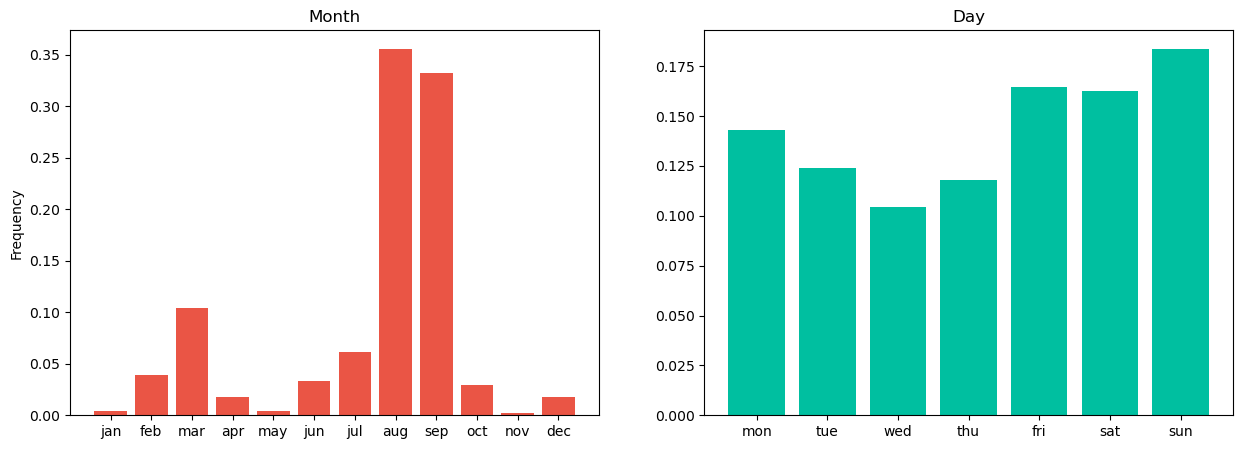

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.bar(month_ord,month_f[month_ord].values[0],color='#ea5545')
plt.title('Month')
plt.ylabel('Frequency')
plt.subplot(122)
plt.bar(day_ord,day_f[day_ord].values[0],color='#00bfa0')
plt.title('Day')
plt.show()

### Variables númericas

Calculamos estadísticos descriptivos básicos: **media, mediana, desviación estandard, moda, rango** y **cuartiles**.

In [9]:
# Excluyo las variables X e Y para tratarlas como variables geoespaciales
numerical = [x for x in X.columns if df[x].dtype != 'object' and x != 'X' and x != 'Y']
numerical

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']

La función describe() proporciona todos excepto moda. Técnicamente la mediana coincide con el segundo cuártil, de todas formas lo calculo de nuevo.

Para la moda cojo alguno de los valores que más ocurre en caso de empate.

In [10]:
# Describimos las variables númericas
describe = X[numerical].describe()

# Calculo la mediana y la moda
frames=[describe.T,X[numerical].median(),X[numerical].mode()[:1].T]

# Concateno los 3 DataFrames
df_describe = pd.concat(frames,axis=1, join='inner')

# Añado los nombres median y mode como índice
df_describe.columns = list(df_describe.columns[:8])+['median','mode']
df_describe.T

,FFMC,DMC,DC,ISI,temp,RH,wind,rain
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000
median,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000
mode,91.600000,99.000000,745.300000,9.600000,17.400000,27.000000,2.200000,0.000000


Realizamos el histograma

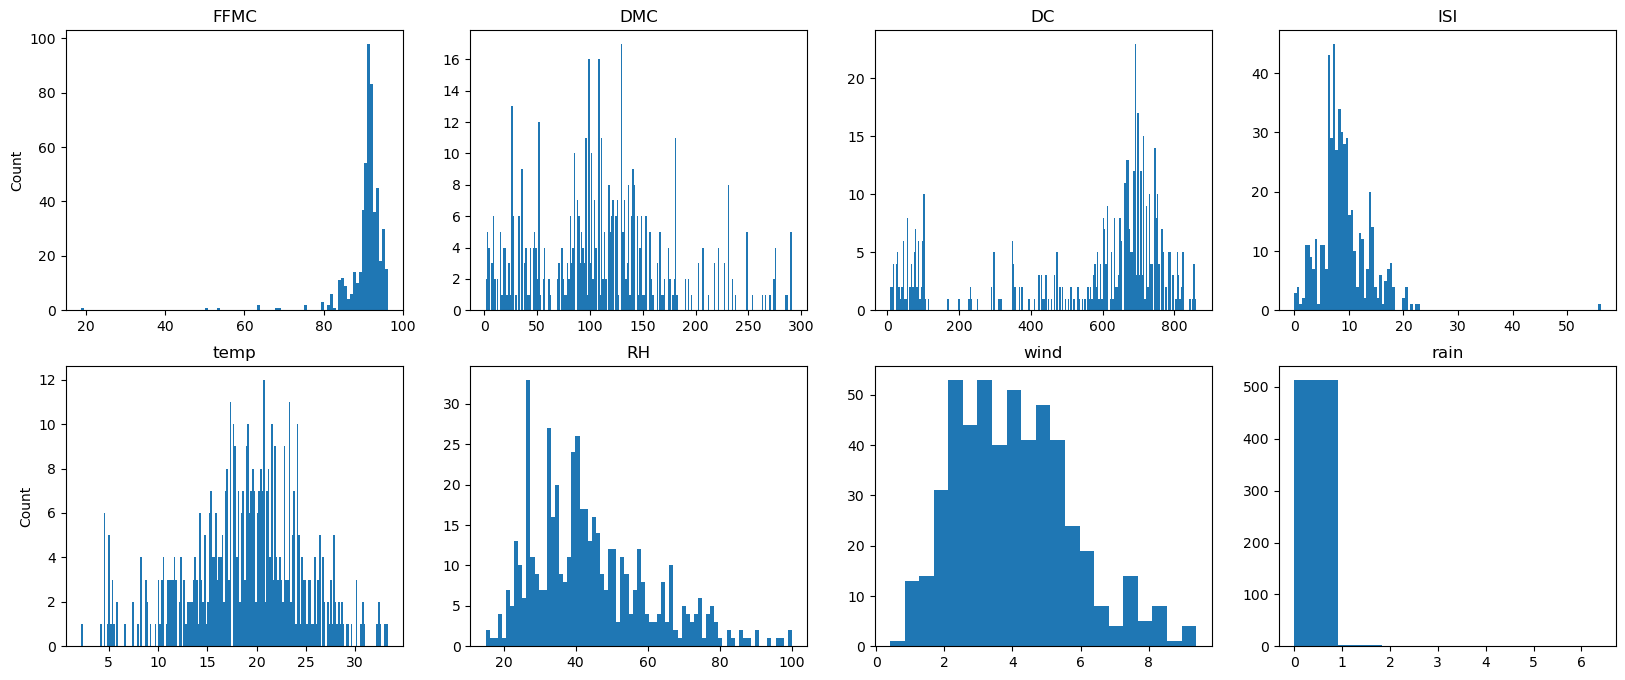

In [11]:
plt.figure(figsize=(20, 8))
position = 1

# Para cada variable númerica ploteo un histograma
for col in numerical:
    plt.subplot(2,4,position)
    plt.hist(X[col], bins=len(X[col].value_counts()))
    plt.title(col)
    # ylabel sólo en el borde del plot para una mejor visualización
    if position == 1 or position == 5:
        plt.ylabel('Count')
    position+=1
    
plt.show()

### Variables geoespaciales

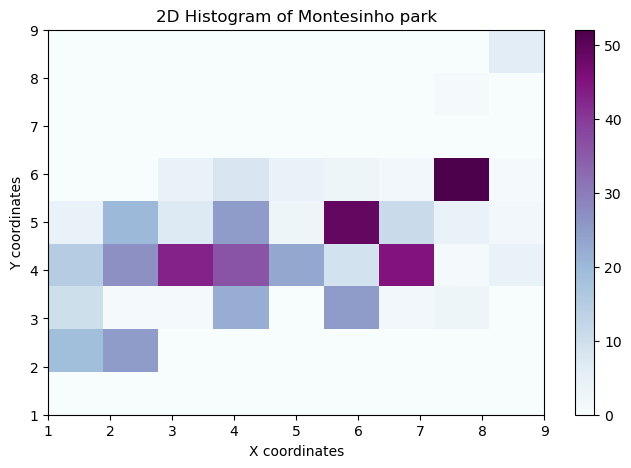

In [14]:
plt.figure(figsize=(8, 5))
# Especifico los rangos para mantener la relación de tamaño X-Y
plt.hist2d(X['X'], X['Y'], bins=len(X['X'].value_counts()),cmap='BuPu',range=[[1,9],[1,9]])
plt.title('2D Histogram of Montesinho park')
plt.xlabel('X coordinates')
plt.ylabel('Y coordinates')
plt.colorbar()
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> comentad los resultados.
</div>

#### Variables categóricas
###### Meses
Podemos observar en el *plot* que **Agosto** y **Septiembre** causan la mayoría de incendios. También tenemos un pico en **Marzo**.

Diversos factores pueden afectar como la temperatura (*Agosto-Septiembre* son los meses más calorosos). *Marzo* es un mes con poca humedad, ambiente cálido y fuertes vientos que pueden dispersar las chispas.
###### Días
La distribución es bastante equitativa. Un mayor porcentaje pero ocurre en el **fin de semana** (*Viernes-Sabado-Domingo*) 

#### Variables numéricas
Encontramos similitudes a una **distribución normal** en las variables *wind*, *temp* y *RH*.

Las variables *DC* y *FFMC* indican que a mayor valor, más incendio. Pues podemos deducir una cierta **correlación directa**.

Las variables *ISI* y *rain* indican lo contrario. Pues deducimos una **correlación inversa**.

La variable *DMC* parece aleatoria hasta cierto punto y quizá se podría descartar si se busca reducir la dimensionalidad.
#### Variables geoespaciales
Observamos una clara tendencia en el centro del histograma 2D.

Con picos en la **coordenada Y(4) con coordenadas X(2-4)** que causa pequeños fuegos alrededor producidos por el viento y expansión.

Los otros estan situados en las **coordenadas X(6)Y(5), X(7)Y(4)** y **X(8)Y(3)**

## 2.2 Análisis exploratorio de los datos

En este apartado exploraremos la relación de los atributos descriptivos con la variable objetivo.
<br>
Nota: trataremos de forma diferente los atributos categóricos de los numéricos

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> para cada variable categórica, mostrad un gráfico donde superpondréis para cada categoría un histograma de los valores de la variable objetivo. Añadid una leyenda para saber a qué clase corresponde cada histograma
    
La finalidad es observar como se distribuye el valor de la variable objetivo en función de los valores de las categorías de cada variable categórica. De esta forma, identificaremos de manera visual y rápida si este atributo categórico está relacionado o no con diferentes valores de la respuesta.

<hr>
Sugerencia: podéis usar la función "hist" de la librería "matplotlib", así como su parámetro "alpha" (transparencia) para que se aprecien los histogramas superpuestos.
</div>

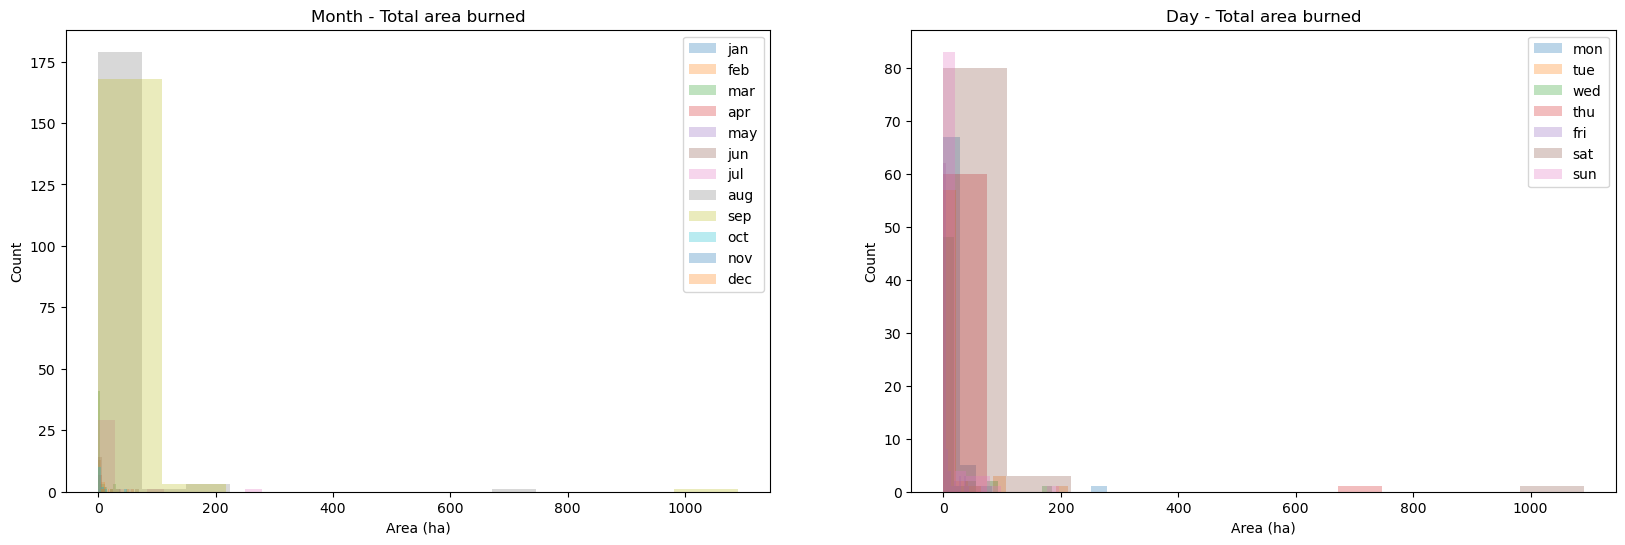

In [15]:
plt.figure(figsize=(20,6))

# Month plot
plt.subplot(121)
plt.title("Month - Total area burned")
plt.ylabel("Count")
plt.xlabel("Area (ha)")
#Para cada mes, añado al plot su histograma
for m in month_ord:
    plt.hist(df[df['month'] == m]['area'], alpha=0.3, label=m)
plt.legend()

#Day plot
plt.subplot(122)
plt.title("Day - Total area burned")
plt.ylabel("Count")
plt.xlabel("Area (ha)")
#Para cada día, añado al plot su histograma
for d in day_ord:
    plt.hist(df[df['day'] == d]['area'], alpha=0.3, label=d)
plt.legend()

#Figure plot
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> mirando los histogramas, ¿te parece que los atributos categóricos tendrán algún peso a la hora de predecir la variable objetivo? ¿Porqué? 
</div>

Realmente no se puede apreciar una clara tendencia en el histograma, dado que está muy solapado y gran parte de los datos tienen valor 0. De manera opcional, he ploteado un histograma de las variables categóricas respecto a **la media de hectáreas quemadas** que es más entendible.En este vemos, que los meses *Mayo*, *Septiembre* y *Julio* tienen mayor área de media.

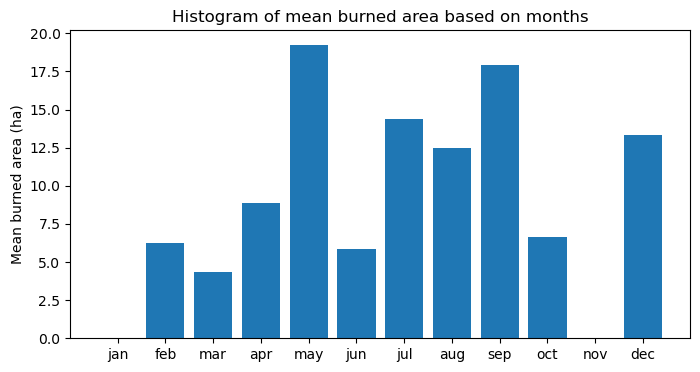

In [16]:
plt.figure(figsize=(8,4))
plt.bar(month_ord, df.groupby('month', as_index=True)['area'].mean()[month_ord])
plt.title("Histogram of mean burned area based on months")
plt.ylabel("Mean burned area (ha)")
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> para cada categoría de las variables categóricas calculad los valores de media y desviación estandard de la variable objetivo. La finalidad de este ejercicio es verificar numéricamente las diferencias identificadas anteriormente de forma visual.
<hr>
Sugerencia: podéis usar las funciones "mean" y "std" de la librería "numpy".
</div>

###### Month

In [17]:
# Calculo la media y la desviación estándar por grupos
frames = [df.groupby('month', as_index=True)['area'].mean(),df.groupby('month', as_index=True)['area'].std()]
# Concateno ambos DataFrames
df_months = pd.concat(frames,axis=1, join='inner')
# Añado los nombres mean y std como índices
df_months.columns = ['mean','std']
df_months.T[month_ord]

month,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec
mean,0.0,6.27500,4.356667,8.891111,19.240000,5.841176,14.369687,12.489076,17.942616,6.638000,0.0,13.330000
std,0.0,12.34251,9.140107,19.929092,27.209469,16.884945,50.849299,60.364174,87.648175,13.699522,NaN,6.610747


###### Day

In [18]:
# Calculo la media y la desviación estándar por grupos
frames = [df.groupby('day', as_index=True)['area'].mean(),df.groupby('day', as_index=True)['area'].std()]
# Concateno ambos DataFrames
df_days = pd.concat(frames,axis=1, join='inner')
# Añado los nombres mean y std como índices
df_days.columns = ['mean','std']
df_days.T[day_ord]

day,mon,tue,wed,thu,fri,sat,sun
mean,9.547703,12.621719,10.714815,16.345902,5.261647,25.534048,10.104526
std,33.703562,33.568193,30.285914,95.351052,10.012083,122.698840,26.076032


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> calculad y mostrad la correlación entre todos los atributos numéricos (incluyendo los geoespaciales) y la respuesta.
</div>

En la figura, he ordenado los valores de la correlación. Dejando los valores con **mayor correlación directa** arriba y los con **mayor correlación inversa** abajo. En el centro se encontrarán los atributos con menor correlación.

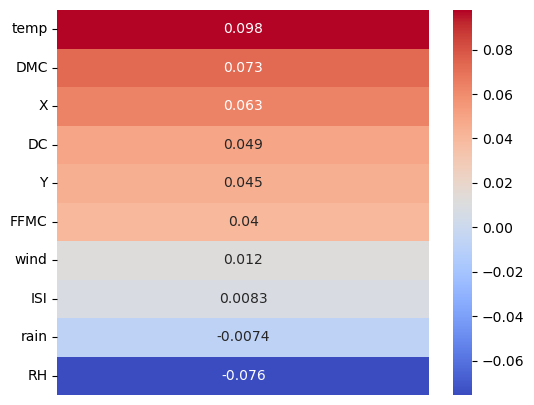

In [19]:
plt.figure(figsize=(6,5))
# Ordeno los valores para una mejor visualización
sns.heatmap(pd.DataFrame(X.corrwith(y,numeric_only=True)).sort_values(by=[0],ascending=False),annot=True,cmap='coolwarm',xticklabels=False)
plt.yticks(rotation=0)
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> representad gráficamente las relaciones entre todas las parejas de las variables numéricas del conjunto de datos (incluyendo las geoespaciales). La finalidad de este ejercicio es poder observar y analizar las correlaciones entre las variables de manera gráfica.
<hr>Sugerencia: podéis usar la función "pairplot" de la librería 'seaborn'.
</div>

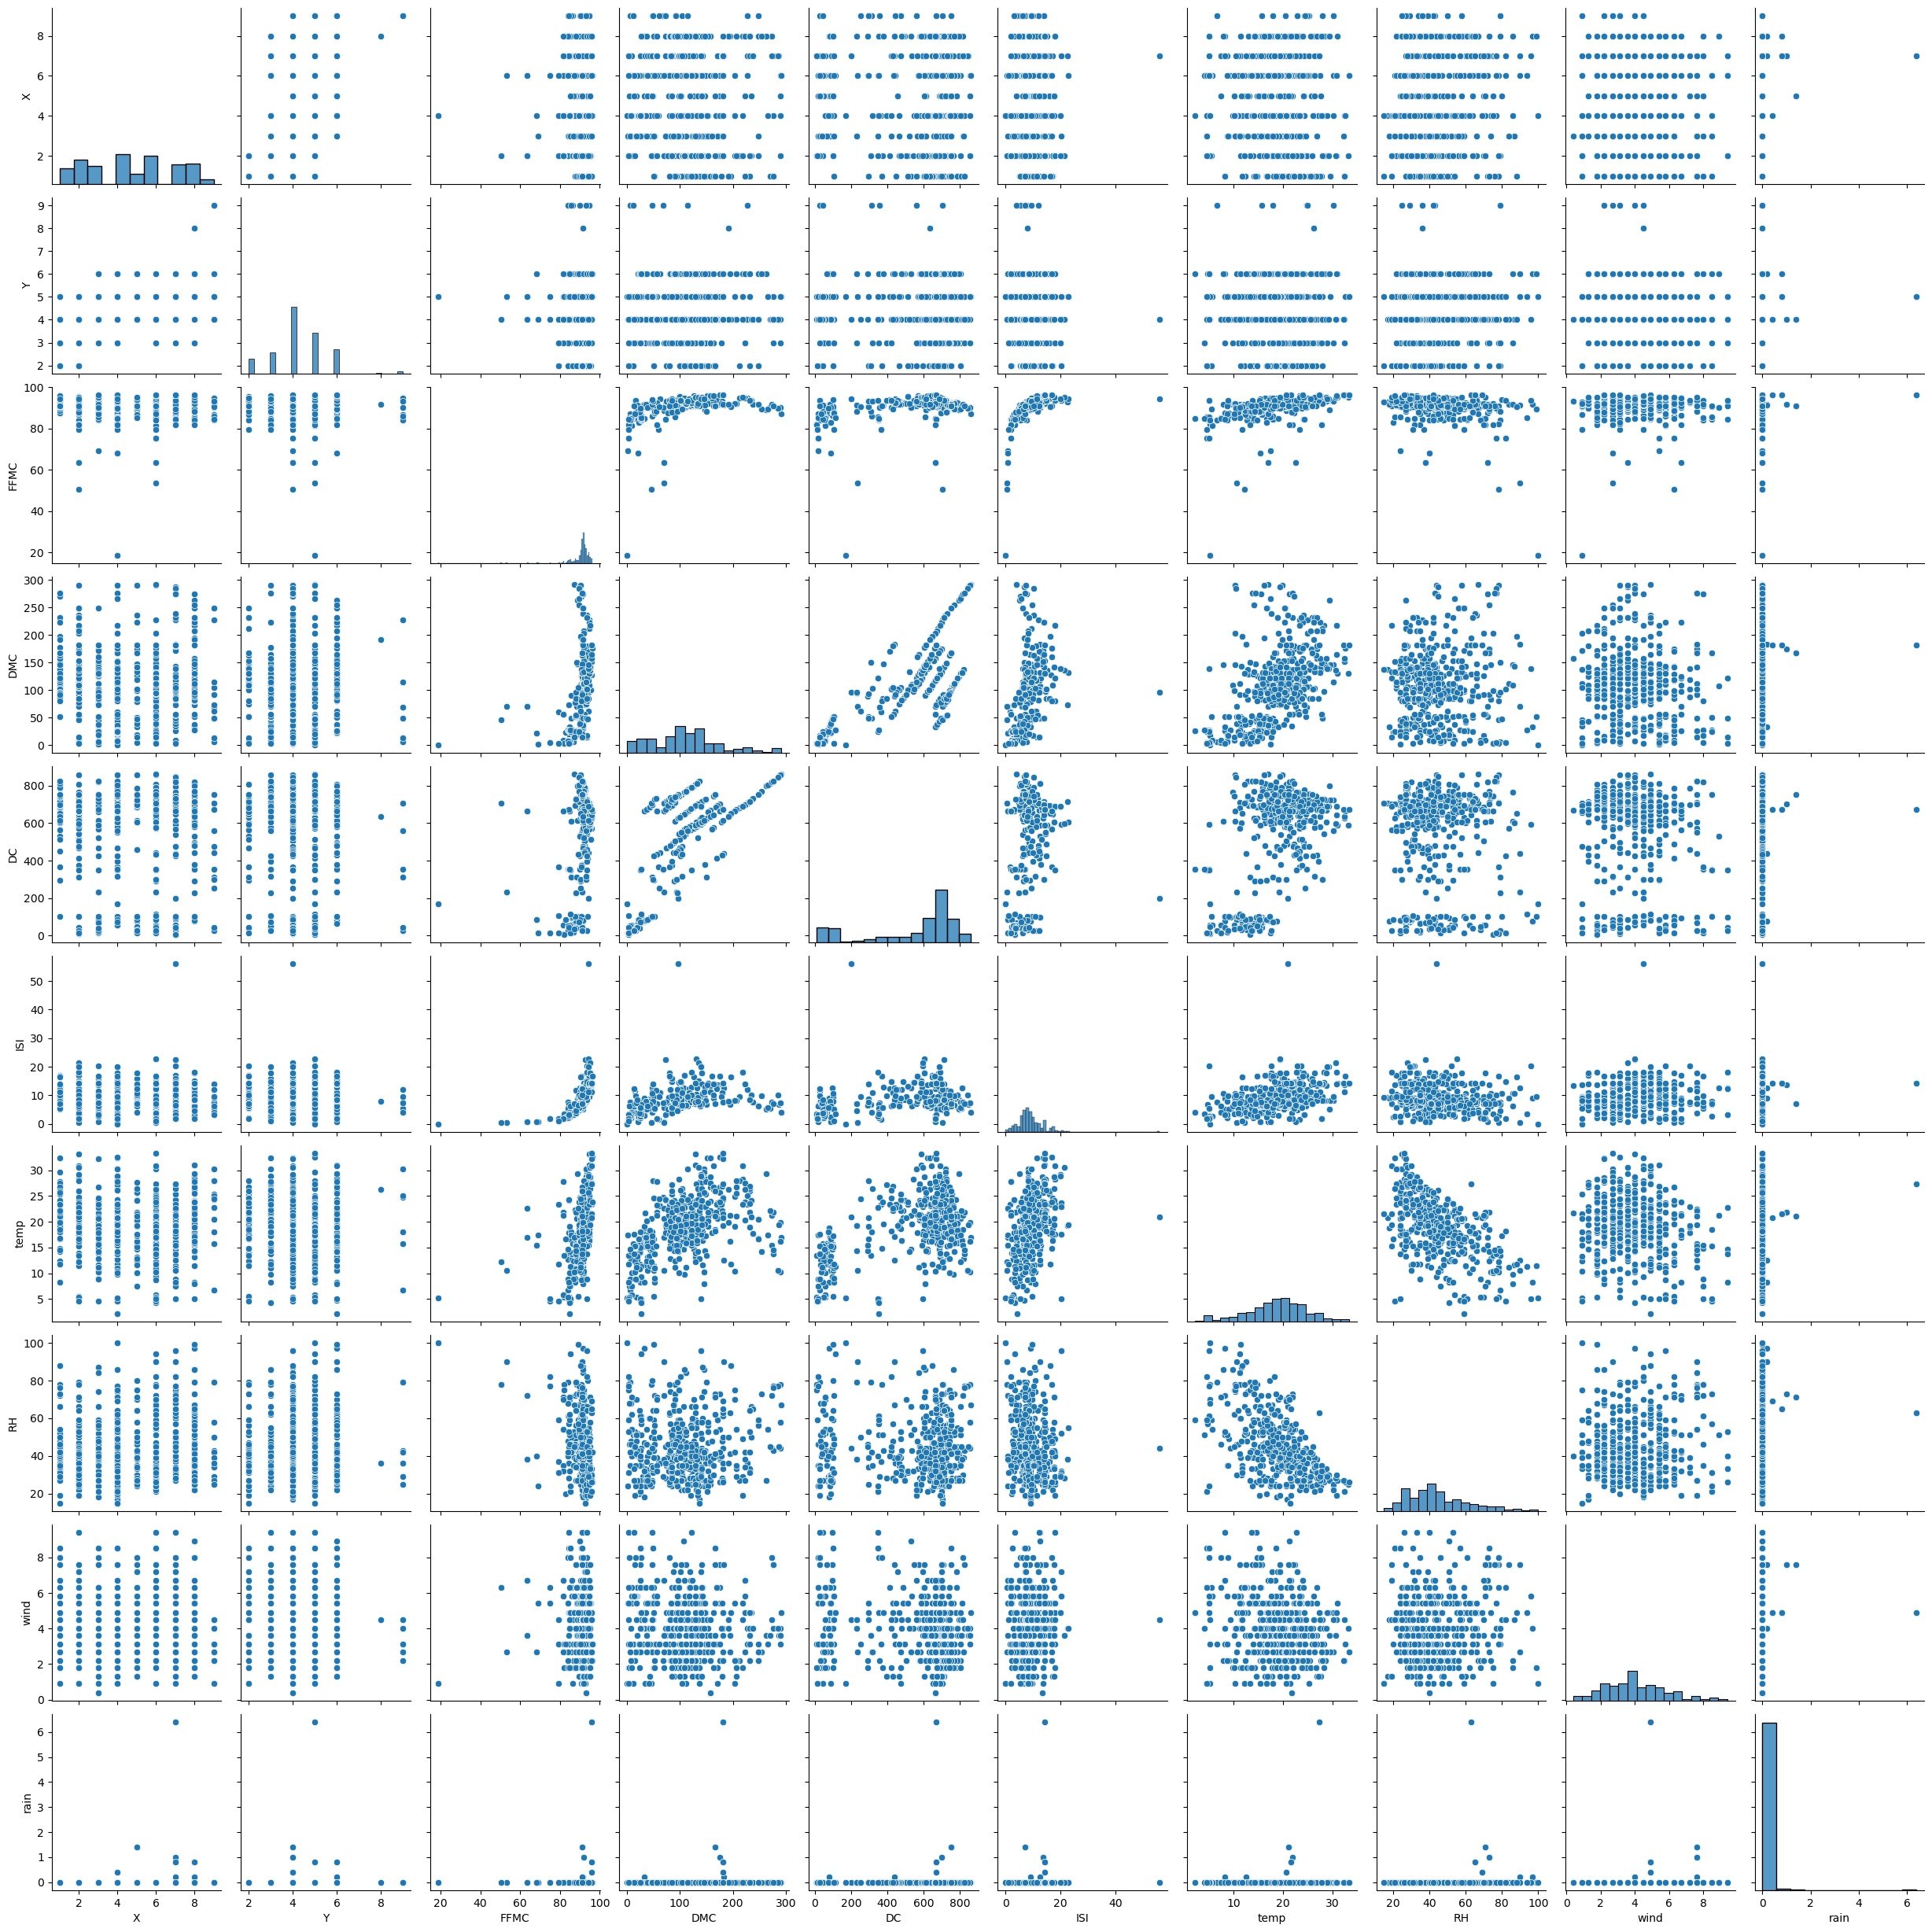

In [20]:
# Añadimos las variables X e Y, como indicado en el enunciado
sns.pairplot(X[[['X','Y']+numerical][0]])
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> identificad los 2 atributos que tienen una correlación más fuerte con la respuesta y los 3 con una correlación más débil (coeficiente de correlación mayor o menor en valor absoluto).
    
Para observar y analizar las correlaciones gráficamente, representad, para cada uno de los 5 atributos identificados, un scatter plot con el atributo en el eje x y la respuesta en el eje y. Además, en cada gráfico añadid la representación de una regresión lineal que fite los puntos.
        
<hr>Sugerencia: podéis usar la función "regplot" de la librería 'seaborn'.
</div>

In [21]:
# Ordeno las correlaciones según su valor absoluto
sorted_corr_abs = abs(pd.DataFrame(X.corrwith(y, numeric_only=True))).sort_values(by=[0],ascending=False)
# Las 2 primeras tienen mayor correlación
strong_corr = list(sorted_corr_abs[0:2].index)
# Las 3 últimas tienen menor correlación
soft_corr = list(sorted_corr_abs[-3:].index)
print(f"Los 2 atributos con una correlación más fuerte son: {' '.join(strong_corr).replace(' ', ', ')}")
print(f"Los 3 atributos con una correlación más débil son: {' '.join(soft_corr).replace(' ', ', ')}")

Los 2 atributos con una correlación más fuerte son: temp, RH
Los 3 atributos con una correlación más débil son: wind, ISI, rain


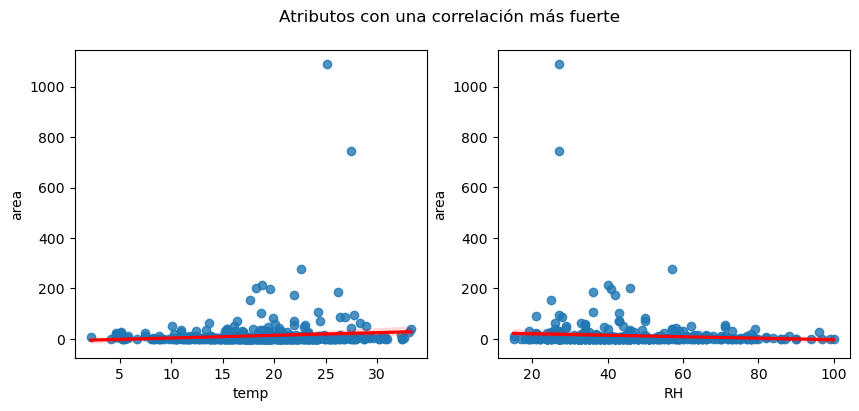

In [22]:
plt.figure(figsize=(10,4))
position=1
# Para cara correlación 'fuerte' hago un scatter plot con su regresión lineal
for att in strong_corr:
    plt.subplot(1,2,position)
    # Cojo un color diferente para la linea diferenciar del scatter plot
    sns.regplot(x=X[att], y=y, line_kws={"color": "red"})
    position+=1
plt.suptitle("Atributos con una correlación más fuerte")
plt.show()

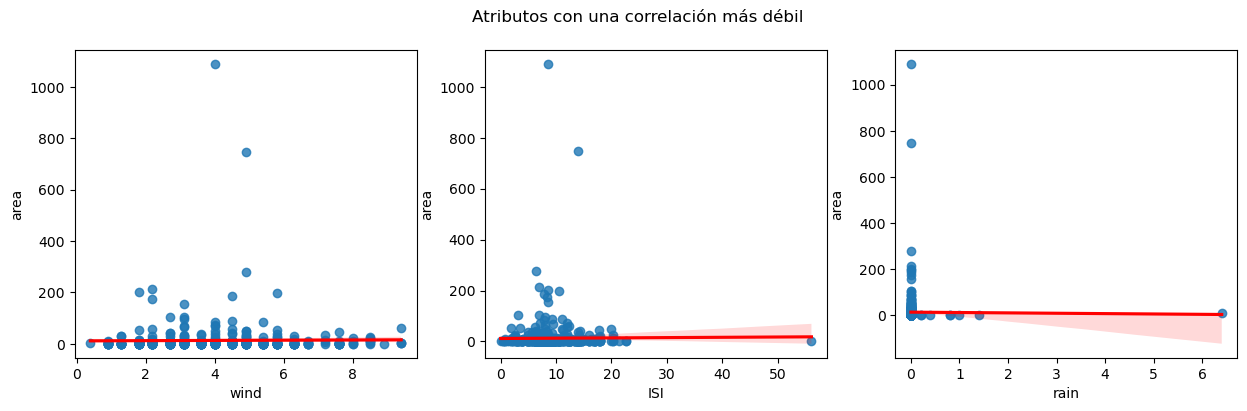

In [23]:
plt.figure(figsize=(15,4))
position=1
# Para cara correlación 'débil' hago un scatter plot con su regresión lineal
for att in soft_corr:
    plt.subplot(1,3,position)
    # Cojo un color diferente para la linea diferenciar del scatter plot
    sns.regplot(x=X[att], y=y, line_kws={"color": "red"})
    position+=1
plt.suptitle("Atributos con una correlación más débil")
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> observando los gráficos, comentad brevemente si conseguís ver las altas o bajas correlaciones que habíais identificado numéricamente.
</div>

Las correlaciones son bastante bajas. El atributo con mayor correlación tiene un valor de *0.098*. En los atributos que hemos identificado cómo mayor correlación se intuye mínimamente una correlación lineal, cosa que para los de menor correlación no.

# 3. Preprocesado de los datos (3 puntos)

Una vez analizados los atributos descriptivos, es el momento de prepararlos para que nos sean útiles de cara a predecir valores. En este apartado:
<li>Transformaremos las variables categóricas en varias variables binarias, una para cada categoría.</li>
<li>Estandarizaremos los valores de los atributos descriptivos para que sus escalas no sean muy diferentes.</li>
<li>Separaremos el conjunto de datos original en dos subconjuntos: entrenamiento y test.</li>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> elimina los atributos categóricos del conjunto de datos y en su lugar introduce la transformación de dichos atributos a tantas variables binarias como categorías tengan.
<hr>
Sugerencia: utilizad la función "get_dummies" de "pandas".
</div>

In [24]:
# One-Hot Encoding
dummies = pd.get_dummies(X[categorical])

# Eliminamos los atributos categóricos originales
X_preprocessed = X.drop(categorical, axis=1)

# Concatenamos el DataFrame de los atributos numéricos con las variables binarias
X_preprocessed = pd.concat([X_preprocessed, dummies], axis=1)

#Visualización
X_preprocessed.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,7,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
1,7,4,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,7,4,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
3,8,6,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
4,8,6,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> estandariza todos los atributos descriptivos.
<hr>
Sugerencia: utilizad "StandardScaler" de "preprocessing".
</div>

$$
z =\frac{x_{i} - u}{s} \\
$$
Donde *u* es la media y *s* la desviación estándar.

In [25]:
# Creamos un objeto StandardScaler
scaler = preprocessing.StandardScaler()

# Estimamos la media y la desviación estándar de cada atributo descriptivo
scaler.fit(X_preprocessed)

# Estandarizamos los atributos descriptivos
X_estandarizado = pd.DataFrame(scaler.transform(X_preprocessed))

# Actualizamos los nombres de las columnas
X_estandarizado.columns=X_preprocessed.columns

X_estandarizado.head()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,month_apr,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_fri,day_mon,day_sat,day_sun,day_thu,day_tue,day_wed
0,1.008313,0.569860,-0.805959,-1.323326,-1.830477,-0.860946,-1.842640,0.411724,1.498614,-0.073268,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,2.254407,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512
1,1.008313,-0.244001,-0.008102,-1.179541,0.488891,-0.509688,-0.153278,-0.692456,-1.741756,-0.073268,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081,-0.443576,-0.408709,-0.440449,-0.474467,-0.365748,2.660475,-0.341512
2,1.008313,-0.244001,-0.008102,-1.049822,0.560715,-0.509688,-0.739383,-0.692456,-1.518282,-0.073268,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,-0.341512,-0.062318,-0.044023,5.785038,-0.706081,-0.443576,-0.408709,2.270410,-0.474467,-0.365748,-0.375873,-0.341512
3,1.440925,1.383722,0.191362,-1.212361,-1.898266,-0.004756,-1.825402,3.233519,-0.009834,0.603155,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,2.254407,-0.408709,-0.440449,-0.474467,-0.365748,-0.375873,-0.341512
4,1.440925,1.383722,-0.243833,-0.931043,-1.798600,0.126966,-1.291012,3.356206,-1.238940,-0.073268,-0.133103,-0.743339,-0.133103,-0.200603,-0.062318,-0.256865,-0.184391,2.928152,-0.062318,-0.044023,-0.172860,-0.706081,-0.443576,-0.408709,-0.440449,2.107630,-0.365748,-0.375873,-0.341512


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> separa los atributos descriptivos y la variable objetivo en los subconjuntos de entrenamiento y test.
<hr>
Sugerencia: para separar entre train y test podéis usar "train_test_split" de sklearn.<br>
</div>

In [26]:
# random_state baraja el dataset antes del split. Al añadir un Integer podemos reproducir el split.
X_train, X_test, y_train, y_test = train_test_split(X_estandarizado, y, test_size=0.2, random_state=42)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> explica si la decisión de transformar el conjunto de datos (variables categóricas y estandarización) antes de realizar la separación del conjunto de datos en los subconjuntos de entrenamiento y test es una buena idea.
</div>

La decisión de transformar los datos antes de dividirlos en conjuntos de entrenamiento y test **no es una buena idea**.

Esto se debe a que puede haber una **filtración de información** entre los dos subconjuntos, lo que significa que el conjunto de entrenamiento puede haber sido estandarizado teniendo en cuenta información del conjunto de test.

Idealmente, queremos que ambos subconjuntos sean independientes para que el modelo pueda entrenar con datos que no tienen ninguna conexión con el conjunto de test. Solo así podremos evaluar correctamente la capacidad predictiva del modelo sobre datos nuevos que nunca ha visto.

# 4. Reducción de la dimensionalidad (2 puntos)

Con el propósito de comprobar visualmente la distribución de la variable objetivo teniendo en cuenta todos los atributos descriptivos a la vez, vamos a reducir la dimensionalidad del problema a solamente dos atributos que serán la proyección de los atributos descriptivos originales.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Aplicad el método de reducción de la dimensionalidad Principal Component Analysis (PCA) para reducir a 2 dimensiones el dataset original que contiene todos los atributos.</li>
    <li>Generad un gráfico con el resultado del PCA en el que se muestre, en función de los valores de las dos componentes en los ejes x e y, el valor de la variable objetivo usando la escala de colores. El objetivo es visualizar la variación de la variable objetivo en función de los valores de las componentes principales generadas.</li>
</ul>
    
NOTA: cuidado, no incluyáis la variable objetivo en la reducción de dimensionalidad. Queremos explicar la variable objetivo en función del resto de variables reducidas a dos dimensiones.

<hr>
Sugerencia: no es necesario que programéis el algoritmo de PCA, podéis usar la implementación disponible en la librería de "scikit-learn".<br>
Sugerencia: para el gráfico, podéis usar el scatter plot de matplotlib con el parámetro "c", que indica el color de los puntos, igual a la variable objetivo.<br>
Sugerencia: utilizad el parámetro "norm=matplotlib.colors.LogNorm()" dentro del "scatter" para mostrar de forma logarítmica el área quemada de bosque.
</div>

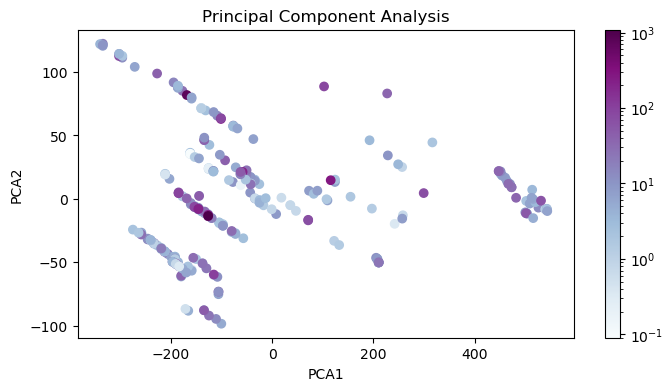

In [27]:
# Aplicamos PCA con dos componentes
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_preprocessed)

# Creamos el scatter plot como definido en el enunciado
plt.figure(figsize=(8,4))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, norm=matplotlib.colors.LogNorm(), cmap="BuPu")
plt.colorbar()
plt.title("Principal Component Analysis")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong><br>
<ul>
    <li>Repetid la reducción de dimensionalidad, pero en este caso usando TSNE.  Podéis encontrar más información sobre este algoritmo en el link: <a href="https://distill.pub/2016/misread-tsne">https://distill.pub/2016/misread-tsne/</a></li>
    <li>Al igual que antes, generad un gráfico con el resultado del TSNE en el que se muestre, en función de los valores de las 2 nuevas dimensiones en los ejes x e y, el valor de la variable objetivo usando una escala de colores.</li>
</ul>

<hr>
Sugerencia: no es necesario que programéis el algoritmo TSNE, podéis usar la implementación disponible en la librería de "scikit-learn".<br>
Sugerencia: a parte de especificar el número de componentes, probad a usar los parámetros "learning_rate" y "perplexity".<br>
Sugerencia: para el gráfico, podéis usar el scatter plot de matplotlib con el parámetro "c", que indica el color de los puntos, igual a la variable objetivo.<br>
Sugerencia: utilizad el parámetro "norm=matplotlib.colors.LogNorm()" dentro del "scatter" para mostrar de forma logarítmica el área quemada de bosque.
</div>

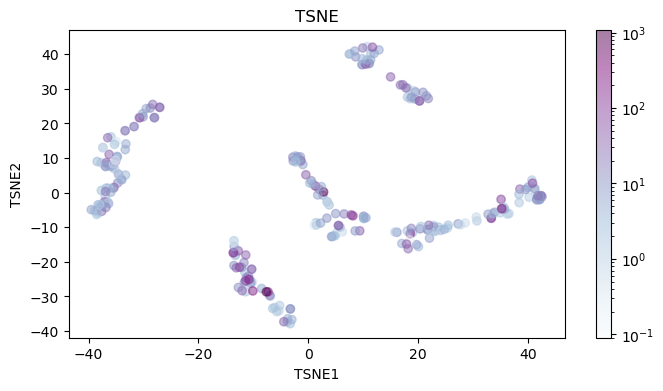

In [28]:
# Aplicamos TSNE con dos componentes
tsne = TSNE(n_components=2, learning_rate=200, perplexity=20, random_state=42)
X_tsne = tsne.fit_transform(X_preprocessed)

# Creamos el scatter plot como definido en el enunciado
plt.figure(figsize=(8,4))
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap='BuPu', alpha=0.5, norm=matplotlib.colors.LogNorm())
plt.colorbar()
plt.title('TSNE')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.show()


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> observando los dos gráficos, ¿creéis que ha funcionado bien la reducción de dimensionalidad? ¿Os parece que las 2 nuevas dimensiones consiguen explicar la variación de la variable objetivo y visualizar diferenciadamente áreas de indendio grandes o pequeñas? ¿Si utilizásemos las 2 nuevas variables para predecir la variable objetivo, serían buenos los resultados obtenidos?
    
¿Por qué obtenemos resultados tan diferentes con los dos métodos?
</div>

Realmente **no consigue explicar** la variable objetivo correctamente. Si que es cierto que ambos vemos patrones (TSNE: agrupaciones; PCA: lineal) pero no resulta claramente separada incendios grandes o pequeños. Un ejemplo ideal, sería en el caso de PCA una linea de menor a mayor incendio o para TSNE grupos exclusivamente de incendio menor o mayor.Los resultados que obtendríamos con estas dos variables no serán buenos.

Los resultados son diferentes porque:
    
   · **PCA** busca correlación lineal entre variables. Por lo que obtendremos un grafo similar al de una regresión lineal en el caso ideal.
    
   · **TSNE** se basa en la distancia entre datos. Por lo que busca crear grupos que atraen datos similares y repelen datos diferentes.


# 5. Entrenamiento y test (1 punto)

En este último ejercicio se trata de aplicar un método de aprendizaje supervisado, concretamente el Random Forest para regresión, con el objetivo de predecir la variable objetivo y evaluar la precisión obtenida con el modelo. Para ello:
<ul>
    <li>Entrenaremos el modelo con el conjunto de entrenamiento y veremos qué tal se comporta tanto con el subconjunto de entrenamiento como con el de test.</li>
    <li>Analizaremos si el resultado obtenido tiene sentido y veremos si se puede mejorar de alguna forma.</li>
</ul>
<br>

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Ejercicio:</strong> usando el conjunto de datos preprocesado (variables categóricas y estandarización) sin aplicar reducción de la dimensionalidad:
<ul>
    <li>Definid un modelo Random Forest (fijando n_estimators=100 y random_state=seed).</li>
    <li>Mostrad la precisión del modelo tanto en el subconjunto de entrenamiento como de test.</li>
</ul>
<hr>
Sugerencia: para entrenar un modelo random forest podéis usar "RandomForestRegressor" de sklearn.<br>
Sugerencia: para mostrar la precisión del modelo podéis usar el método "score" del propio modelo.<br>
</div>

In [29]:
# Aplicar Random Forest. Leves mejoras aplicando max_features=1, n_estimators=1000, max_depth=20
rf = RandomForestRegressor(n_estimators=100, random_state=seed)
rf.fit(X_train, y_train)

# Evaluar precisión del modelo en subconjunto de entrenamiento y test
train_score = rf.score(X_train, y_train)
test_score = rf.score(X_test, y_test)

print(f'Precisión subconjunto de entrenamiento: {round(train_score,3)}')
print(f'Precisión subconjunto de test: {round(test_score,3)}')

Precisión subconjunto de entrenamiento: 0.815
Precisión subconjunto de test: -0.01


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> explica por qué la precisión del modelo sobre los valores de entrenamiento y test presentan esos valores.
</div>

La precisión del modelo en el entrenamiento es buena (0.815), ya que el modelo se ha ajustado a ese subconjunto.

Sin embargo, al evaluar el modelo sobre el subconjunto de test vemos que la precisión es muy mala. Esto es debido a que el modelo realmente no ha aprendido a generalizar patrones, sino ha memorizado el subconjunto de entrenamiento (*overfitting*).
Además, que el conjunto de datos no es demasiado bueno y Random Forest da la falsa ilusión de un modelo bien entrenado.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Análisis:</strong> discutid qué técnicas podríais aplicar para mejorar la situación actual del modelo.
</div>

Hay diversas formas de mejorar el modelo:

**Seleccionar características o reducir la dimensionalidad**: Podríamos eliminar atributos que no son relevantes para mejorar la eficiencia y reducir el overfitting. Además, utilizando las nuevas variables conseguidas con **PCA** y **TSNE**, en lugar de todos los atributos, podemos conseguir generalizar el modelo resultando en una primera mejora (aunque pequeña).

**Ajusta los hiperparámetros**: He probado algunos de los parámetros de RandomForestRegressor especificados en la librería consiguiendo una *leve* mejora. Por ejemplo: *max_depth, n_estimators* y *max_features*.

**Cambiar algoritmo del modelo**: Probablemente la técnica que puede producir una mayor mejora. Utilizar otro algortimo de modelos supervisados como Redes Neuronales o Regresión Lineal.

**Conseguir un mejor dataset**: El dataset actual es mejorable. Contiene una gran cantidad de incendios de área 0.